In [45]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../src')


import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy


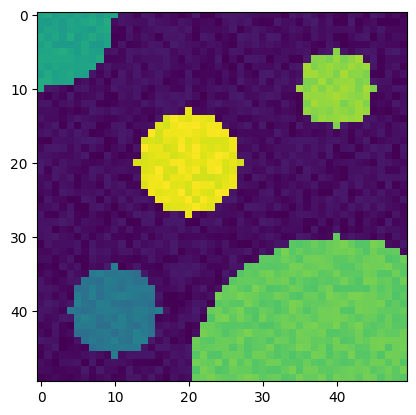

In [475]:
img_array, sh = methods.dots_2d()
# img_array, sh = methods.blank(n=5, noise=0)
# img_array, sh = methods.pd()

plt.imshow(img_array)

In [241]:
mask_array = np.full(img_array.shape, True)
# mask_array = img_array > 0

dist, v_coords = methods._distance_information_from_img_array(img_array, neighbour_depth=2)
G = methods._img_array_to_graph(img_array, mask_array = mask_array, neighbour_depth=1, pixel_sig=1, img_sig=1)

TypeError: _w0() got an unexpected keyword argument 'pixel_sig'

In [242]:
# mask_array = img_array > 0
mask_array = np.full(img_array.shape, True)


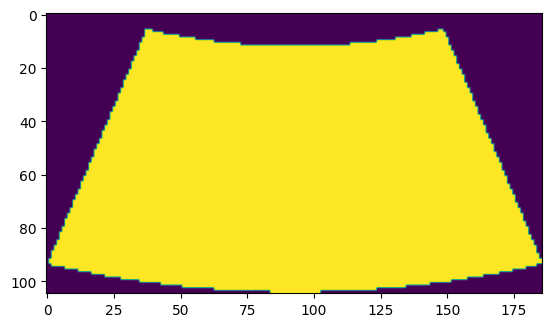

In [127]:
plt.imshow(mask_array)

In [57]:
# print(dist.row)
# print(dist.col)
# print(dist.shape)
# print(dist.nnz)

In [58]:
# # visualise...
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=True, font_weight='bold')
tmp = nx.to_scipy_sparse_array(G, format='coo')
# betterspy.show(dist, colormap="viridis")
dist

<19530x19530 sparse matrix of type '<class 'numpy.float64'>'
	with 250984 stored elements in COOrdinate format>

In [59]:
nodes = G.nodes
nodes

NodeView((3891, 3892, 3996, 3893, 3998, 3997, 4101, 4103, 4102, 3894, 3999, 4104, 3789, 3790, 3791, 3686, 3687, 3792, 3895, 3896, 3897, 4105, 4000, 4001, 4106, 4002, 4107, 4207, 4208, 4209, 4210, 4211, 4212, 4313, 4312, 4418, 4417, 4523, 4522, 4628, 4733, 4314, 4419, 4629, 4524, 4734, 4420, 4315, 4316, 4421, 4317, 4422, 4525, 4526, 4527, 4735, 4630, 4631, 4736, 4632, 4737, 3688, 3793, 4003, 3898, 4108, 4423, 4318, 4213, 4633, 4528, 4738, 3378, 3483, 3482, 3481, 3379, 3484, 3486, 3485, 3381, 3380, 3276, 3487, 3277, 3382, 3173, 3174, 3175, 3070, 3278, 3279, 3280, 3488, 3383, 3384, 3489, 3385, 3490, 3588, 3586, 3587, 3591, 3589, 3590, 3592, 3593, 3594, 3595, 3690, 3795, 3585, 3689, 3794, 3584, 3900, 3899, 4109, 4110, 4004, 4005, 3691, 3796, 3901, 4006, 4111, 3693, 3692, 3798, 3797, 3902, 3903, 4007, 4008, 4112, 4113, 4214, 4215, 4216, 4217, 4218, 4320, 4319, 4424, 4425, 4530, 4529, 4635, 4739, 4634, 4740, 4321, 4426, 4531, 4636, 4741, 4322, 4323, 4427, 4428, 4532, 4533, 4638, 4637, 4742, 

In [60]:
# G.edges

In [61]:
# betterspy.show(tmp) # error?

In [62]:
N = nx.normalized_laplacian_matrix(G)

In [28]:
# betterspy.show(G.dist)

DecompressionBombError: Image size (381420900 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [63]:
vals, vecs = scipy.sparse.linalg.eigs(N,which='SR')

In [64]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(-vecs[:,2],-vecs[:,0],vecs[:,4],c=np.transpose(img_array).flatten(),cmap='viridis')

In [65]:
# re2 = np.transpose(np.real(vecs[:,0].reshape(sh[1],sh[0]))) # order?
# plt.imshow(re2, cmap='bwr')

In [472]:
wf = methods.WeightKernel(
    dist_sig = 1,
    intensity_sig = 250
)
G = methods.ImageGraph(img_array, mask_array=mask_array, wf=wf, neighbour_depth = 1, cmap='viridis')

In [473]:
G._img_array_to_graph()

In [313]:
N = nx.normalized_laplacian_matrix(G)

In [314]:
N.data

array([ 1.        , -0.32324719, -0.01568577, ..., -0.01634695,
       -0.31605733,  1.        ])

In [269]:
N

<2500x2500 sparse array of type '<class 'numpy.float64'>'
	with 68936 stored elements in Compressed Sparse Row format>

In [315]:
vals, vecs = scipy.sparse.linalg.eigs(N, which='SR')

In [316]:
vecs

array([[-7.31598206e-02+0.j, -4.43965614e-06+0.j, -7.51126576e-03+0.j,
        -2.44652453e-03+0.j, -1.36668412e-02+0.j, -3.36690413e-03+0.j],
       [-9.17912311e-02+0.j, -5.66330798e-06+0.j, -9.42422234e-03+0.j,
        -3.06960132e-03+0.j, -1.71474896e-02+0.j, -4.22438166e-03+0.j],
       [-9.27003941e-02+0.j, -5.92349556e-06+0.j, -9.51781810e-03+0.j,
        -3.10008682e-03+0.j, -1.73177885e-02+0.j, -4.26633578e-03+0.j],
       ...,
       [-2.46016675e-06+0.j,  1.04624806e-08+0.j,  3.38657388e-02+0.j,
        -3.56828825e-03+0.j, -1.69329364e-02+0.j, -4.17233227e-03+0.j],
       [-2.45882137e-06+0.j,  1.11944188e-08+0.j,  3.38462961e-02+0.j,
        -3.56623961e-03+0.j, -1.69232148e-02+0.j, -4.16993682e-03+0.j],
       [-1.98480478e-06+0.j,  9.29677358e-09+0.j,  2.73211064e-02+0.j,
        -2.87870823e-03+0.j, -1.36606070e-02+0.j, -3.36601932e-03+0.j]])

In [67]:
# # iG._calculate_eigen()
# N = nx.normalized_laplacian_matrix(iG.G)
# vals, vecs = scipy.sparse.linalg.eigs(N,which='SR')

In [321]:
plot_array = G._node_vec_to_img_array(np.real(vecs[:,1]))
# plt.imshow(plot_array)

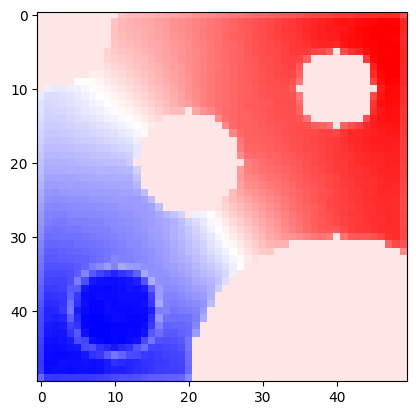

In [322]:
plt.imshow(plot_array, cmap='bwr')

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


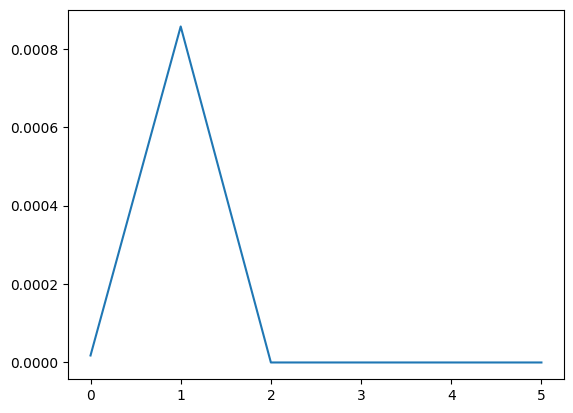

In [323]:
plt.plot(vals)

In [337]:
# import sklearn

real_vecs = np.real(vecs)
S, R = methods.SEBA(real_vecs[:,:5])

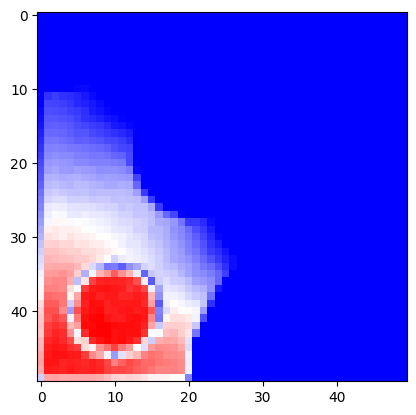

In [344]:
plot_array_1 = G._node_vec_to_img_array(np.real(S[:,1]))
plt.imshow(plot_array_1, cmap='bwr')

In [474]:
nx.write_gexf(G,'test_gexf.gexf')

In [345]:
import graphviz
graphviz

In [388]:
G.nodes[0]['weight'] = 0

# for n in G.nodes:
#     print(n)
G.v_coords[0]

array([0, 0])

In [440]:
img_array

array([[1.51273306e+02, 1.58362539e+02, 1.69386270e+02, ...,
        1.29586040e+00, 2.60772115e+00, 1.30182242e+01],
       [1.56518775e+02, 1.65135736e+02, 1.58767596e+02, ...,
        7.67701740e-02, 1.40283590e+01, 1.12309799e+01],
       [1.59456689e+02, 1.63370005e+02, 1.52821034e+02, ...,
        5.74693621e+00, 5.83021129e+00, 7.84335831e+00],
       ...,
       [4.39608766e+00, 7.94402121e+00, 6.69742702e+00, ...,
        2.19967934e+02, 2.08971002e+02, 2.06403689e+02],
       [3.30209835e+00, 9.87265527e+00, 1.82750470e+01, ...,
        2.06612979e+02, 2.05280938e+02, 2.07357069e+02],
       [1.40747762e+01, 1.01596003e+01, 1.78592278e+01, ...,
        2.17612622e+02, 2.02168307e+02, 2.13022037e+02]])

In [455]:
bins = np.linspace(0, 255, 256)
a = np.digitize(img_array, bins) / 255



In [449]:
a

array([[0.59607843, 0.62352941, 0.66666667, ..., 0.00784314, 0.01176471,
        0.05490196],
       [0.61568627, 0.65098039, 0.62352941, ..., 0.00392157, 0.05882353,
        0.04705882],
       [0.62745098, 0.64313725, 0.6       , ..., 0.02352941, 0.02352941,
        0.03137255],
       ...,
       [0.01960784, 0.03137255, 0.02745098, ..., 0.8627451 , 0.81960784,
        0.81176471],
       [0.01568627, 0.03921569, 0.0745098 , ..., 0.81176471, 0.80784314,
        0.81568627],
       [0.05882353, 0.04313725, 0.07058824, ..., 0.85490196, 0.79607843,
        0.83921569]])

In [426]:
import matplotlib.colors

In [457]:
r, g, b, _ = plt.get_cmap('Blues')(a[0,0])
r

0.2960246059207997